<a href="https://colab.research.google.com/github/safranco8/ayvd-entregables-grupo-31/blob/main/20220510_Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2022**

![comics-dilbert-data-cloud-772680.gif](attachment:comics-dilbert-data-cloud-772680.gif)

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [ ]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
!wget https://raw.githubusercontent.com/safranco8/ayvd-entregables-grupo-31/main/AEyC/melb_data_extended_grupo31.csv

--2022-05-10 22:52:01--  https://raw.githubusercontent.com/safranco8/ayvd-entregables-grupo-31/main/AEyC/melb_data_extended_grupo31.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2680131 (2.6M) [text/plain]
Saving to: ‘melb_data_extended_grupo31.csv’

melb_data_extended_ 100%[===================>]   2.56M  --.-KB/s    in 0.07s   

2022-05-10 22:52:01 (39.2 MB/s) - ‘melb_data_extended_grupo31.csv’ saved [2680131/2680131]



In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
melb_grupo31_df = pandas.read_csv('melb_data_extended_grupo31.csv')
melb_grupo31_df[:3]

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Lattitude,Longtitude,Regionname,Propertycount,avg_price,avg_monthly_price,avg_weekly_price,avg_review_scores_rating,zipcode_count,avg_weekly_price_q
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,-37.7996,144.9984,Northern Metropolitan,4019.0,130.62,2187.03,605.15,95.29,258.0,"(590.0, 606.75]"
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,-37.8079,144.9934,Northern Metropolitan,4019.0,130.62,2187.03,605.15,95.29,258.0,"(590.0, 606.75]"
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,-37.8093,144.9944,Northern Metropolitan,4019.0,130.62,2187.03,605.15,95.29,258.0,"(590.0, 606.75]"


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [ ]:
categorical_cols = ['Type']
numerical_cols = ['Rooms']

In [ ]:
melb_df[categorical_cols].nunique()

Type    3
dtype: int64

In [ ]:
# Check for nulls
melb_df[categorical_cols].isna().sum()

Type    0
dtype: int64

CONSIGNA

    Ejercicio 1: Encoding
    Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, excepto BuildingArea y YearBuilt, que volveremos a imputar más adelante.


In [ ]:
for column in melb_grupo31_df.columns:
    print(column, "---", melb_grupo31_df[column].dtype)

index --- int64
Suburb --- object
Address --- object
Rooms --- int64
Type --- object
Price --- float64
Method --- object
SellerG --- object
Date --- object
Distance --- float64
Postcode --- float64
Bedroom2 --- float64
Bathroom --- float64
Car --- float64
Landsize --- float64
BuildingArea --- float64
YearBuilt --- float64
CouncilArea --- object
Lattitude --- float64
Longtitude --- float64
Regionname --- object
Propertycount --- float64
avg_price --- float64
avg_monthly_price --- float64
avg_weekly_price --- float64
avg_review_scores_rating --- float64
zipcode_count --- float64
avg_weekly_price_q --- object


In [ ]:
melb_grupo31_reduced_df = melb_grupo31_df.copy()

del melb_grupo31_reduced_df['BuildingArea']
del melb_grupo31_reduced_df['YearBuilt']

for column in melb_grupo31_reduced_df.columns:
    print(column, "---", melb_grupo31_reduced_df[column].dtype)


index --- int64
Suburb --- object
Address --- object
Rooms --- int64
Type --- object
Price --- float64
Method --- object
SellerG --- object
Date --- object
Distance --- float64
Postcode --- float64
Bedroom2 --- float64
Bathroom --- float64
Car --- float64
Landsize --- float64
CouncilArea --- object
Lattitude --- float64
Longtitude --- float64
Regionname --- object
Propertycount --- float64
avg_price --- float64
avg_monthly_price --- float64
avg_weekly_price --- float64
avg_review_scores_rating --- float64
zipcode_count --- float64
avg_weekly_price_q --- object


In [ ]:
len(melb_grupo31_reduced_df.index) 

12901

CONSIGNA

    Ejercicio 1: Encoding
    Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit(melb_grupo31_reduced_df[['Suburb']])

columna = list(encoder.categories_[0])
print(columna)
print(len(columna))


['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale', 'Albert Park', 'Albion', 'Alphington', 'Altona', 'Altona Meadows', 'Altona North', 'Ardeer', 'Armadale', 'Ascot Vale', 'Ashburton', 'Ashwood', 'Aspendale', 'Aspendale Gardens', 'Attwood', 'Avondale Heights', 'Bacchus Marsh', 'Balaclava', 'Balwyn', 'Balwyn North', 'Bayswater', 'Bayswater North', 'Beaconsfield', 'Beaconsfield Upper', 'Beaumaris', 'Bellfield', 'Bentleigh', 'Bentleigh East', 'Berwick', 'Black Rock', 'Blackburn', 'Blackburn North', 'Blackburn South', 'Bonbeach', 'Boronia', 'Box Hill', 'Braybrook', 'Briar Hill', 'Brighton', 'Brighton East', 'Broadmeadows', 'Brookfield', 'Brooklyn', 'Brunswick', 'Brunswick East', 'Brunswick West', 'Bulleen', 'Bullengarook', 'Bundoora', 'Burnley', 'Burnside', 'Burnside Heights', 'Burwood', 'Burwood East', 'Cairnlea', 'Camberwell', 'Campbellfield', 'Canterbury', 'Carlton', 'Carlton North', 'Carnegie', 'Caroline Springs', 'Carrum', 'Carrum Downs', 'Caulfield', 'Caulfield East', 'Caulfield

In [ ]:
encoded_types = encoder.transform(melb_grupo31_reduced_df[['Suburb']])
encoded_types #[:10]

print(encoded_types)
print(len(encoded_types))

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
12901


In [ ]:
#for item in columna:
#  print(item, "---",  encoder.transform(item))
#  print(item)

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(melb_grupo31_reduced_df[['Postcode']])

columna = list(encoder.categories_[0])
print(columna)
print(len(columna))

[3000.0, 3002.0, 3003.0, 3006.0, 3008.0, 3011.0, 3012.0, 3013.0, 3015.0, 3016.0, 3018.0, 3019.0, 3020.0, 3021.0, 3022.0, 3023.0, 3024.0, 3025.0, 3027.0, 3028.0, 3029.0, 3030.0, 3031.0, 3032.0, 3033.0, 3034.0, 3036.0, 3037.0, 3038.0, 3039.0, 3040.0, 3041.0, 3042.0, 3043.0, 3044.0, 3046.0, 3047.0, 3048.0, 3049.0, 3051.0, 3052.0, 3053.0, 3054.0, 3055.0, 3056.0, 3057.0, 3058.0, 3059.0, 3060.0, 3061.0, 3064.0, 3065.0, 3066.0, 3067.0, 3068.0, 3070.0, 3071.0, 3072.0, 3073.0, 3074.0, 3075.0, 3076.0, 3078.0, 3079.0, 3081.0, 3082.0, 3083.0, 3084.0, 3085.0, 3087.0, 3088.0, 3089.0, 3093.0, 3094.0, 3095.0, 3099.0, 3101.0, 3102.0, 3103.0, 3104.0, 3105.0, 3106.0, 3107.0, 3108.0, 3109.0, 3111.0, 3113.0, 3115.0, 3116.0, 3121.0, 3122.0, 3123.0, 3124.0, 3125.0, 3126.0, 3127.0, 3128.0, 3130.0, 3131.0, 3132.0, 3133.0, 3134.0, 3135.0, 3136.0, 3137.0, 3138.0, 3141.0, 3142.0, 3143.0, 3144.0, 3145.0, 3146.0, 3147.0, 3148.0, 3149.0, 3150.0, 3151.0, 3152.0, 3153.0, 3154.0, 3155.0, 3156.0, 3158.0, 3161.0, 3162.0,

In [ ]:
encoded_types = encoder.transform(melb_grupo31_reduced_df[['Postcode']])
encoded_types #[:10]

print(encoded_types)
print(len(encoded_types))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
12901


Metodo extendido para TODAS las columnas

    CONSIGNA:
    Algunas opciones:
    Utilizar OneHotEncoder junto con el parámetro categories para las variables categóricas y luego usar numpy.hstack para concatenar el resultado con las variables numéricas.
    DictVectorizer con algunos pasos de pre-proceso previo.


In [ ]:
feature_cols = ['Suburb', 'Type', 'Distance', 'Bedroom2', 'Bathroom',
            'Car', 'Landsize', 'Regionname']

feature_dict = list(melb_grupo31_reduced_df[feature_cols].T.to_dict().values())
feature_dict[:2]

[{'Bathroom': 1.0,
  'Bedroom2': 2.0,
  'Car': 1.0,
  'Distance': 2.5,
  'Landsize': 202.0,
  'Regionname': 'Northern Metropolitan',
  'Suburb': 'Abbotsford',
  'Type': 'h'},
 {'Bathroom': 1.0,
  'Bedroom2': 2.0,
  'Car': 0.0,
  'Distance': 2.5,
  'Landsize': 156.0,
  'Regionname': 'Northern Metropolitan',
  'Suburb': 'Abbotsford',
  'Type': 'h'}]

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)

feature_matrix

<12901x330 sparse matrix of type '<class 'numpy.float64'>'
	with 103208 stored elements in Compressed Sparse Row format>

In [ ]:
vec.get_feature_names()[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Bathroom',
 'Bedroom2',
 'Car',
 'Distance',
 'Landsize',
 'Regionname=Eastern Metropolitan',
 'Regionname=Eastern Victoria',
 'Regionname=Northern Metropolitan',
 'Regionname=Northern Victoria',
 'Regionname=South-Eastern Metropolitan']

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = melb_grupo31_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
melb_data_mice

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Lattitude,Longtitude,Regionname,Propertycount,avg_price,avg_monthly_price,avg_weekly_price,avg_review_scores_rating,zipcode_count,avg_weekly_price_q
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,-37.79960,144.99840,Northern Metropolitan,4019.0,130.62,2187.03,605.15,95.29,258.0,"(590.0, 606.75]"
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,-37.80790,144.99340,Northern Metropolitan,4019.0,130.62,2187.03,605.15,95.29,258.0,"(590.0, 606.75]"
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,-37.80930,144.99440,Northern Metropolitan,4019.0,130.62,2187.03,605.15,95.29,258.0,"(590.0, 606.75]"
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,-37.79690,144.99690,Northern Metropolitan,4019.0,130.62,2187.03,605.15,95.29,258.0,"(590.0, 606.75]"
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,-37.80720,144.99410,Northern Metropolitan,4019.0,130.62,2187.03,605.15,95.29,258.0,"(590.0, 606.75]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12896,13574,Westmeadows,9 Black St,3,h,582000.0,S,Red,26/08/2017,16.5,...,-37.67917,144.89390,Northern Metropolitan,2474.0,92.29,NaN,400.00,95.30,21.0,"(399.89, 422.876]"
12897,13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,...,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,124.03,1901.61,526.35,93.09,189.0,"(525.43, 553.15]"
12898,13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,...,-37.85927,144.87904,Western Metropolitan,6380.0,191.09,2119.75,612.25,95.02,74.0,"(606.75, 618.76]"
12899,13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,...,-37.85274,144.88738,Western Metropolitan,6380.0,191.09,2119.75,612.25,95.02,74.0,"(606.75, 618.76]"


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

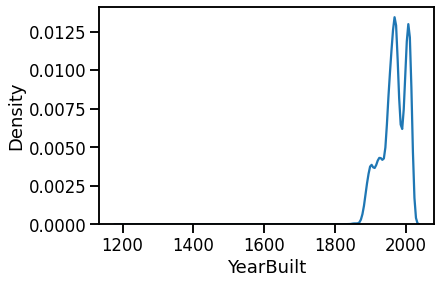

In [ ]:
seaborn.kdeplot(data=melb_grupo31_df, x='YearBuilt')

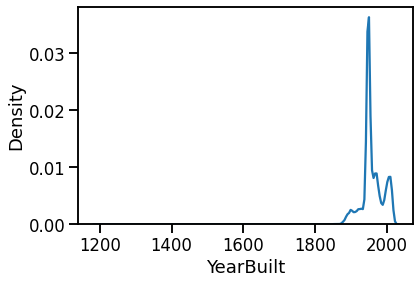

In [ ]:
seaborn.kdeplot(data=melb_data_mice, x='YearBuilt')

In [ ]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN' # over YearBuilt and BuildingArea'

#melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build = melb_grupo31_df.YearBuilt.dropna().to_frame()
#melb_year_build = melb_df.YearBuilt.to_frame()
#melb_year_build = melb_grupo31_df.YearBuilt.to_frame()

melb_year_build['Imputation'] = 'Original'

melb_year_build.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7765 entries, 1 to 12900
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YearBuilt   7765 non-null   float64
 1   Imputation  7765 non-null   object 
dtypes: float64(1), object(1)
memory usage: 182.0+ KB


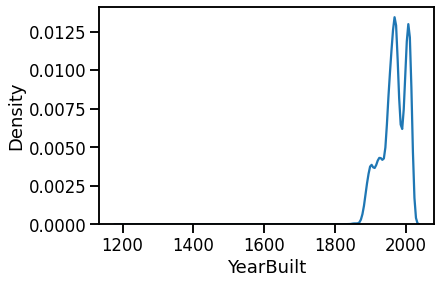

In [ ]:
seaborn.kdeplot(data=melb_year_build, x='YearBuilt')

In [ ]:
mice_year_built.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YearBuilt   12901 non-null  float64
 1   Imputation  12901 non-null  object 
dtypes: float64(1), object(1)
memory usage: 201.7+ KB


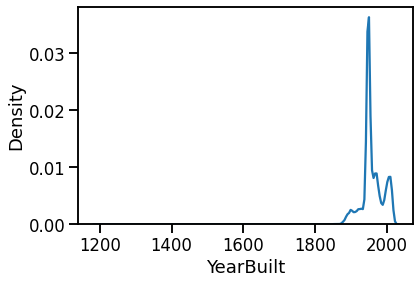

In [ ]:
seaborn.kdeplot(data=mice_year_built, x='YearBuilt')

In [ ]:
data = pandas.concat([mice_year_built, melb_year_build], ignore_index=True)

#data.reindex()
#data = data.loc[:,~data.columns.duplicated(keep='first')]
#data.reset_index()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20666 entries, 0 to 20665
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YearBuilt   20666 non-null  float64
 1   Imputation  20666 non-null  object 
dtypes: float64(1), object(1)
memory usage: 323.0+ KB


In [ ]:
data.head()

,YearBuilt,Imputation
0,1948.4,KNN
1,1900.0,KNN
2,1900.0,KNN
3,1948.4,KNN
4,2014.0,KNN


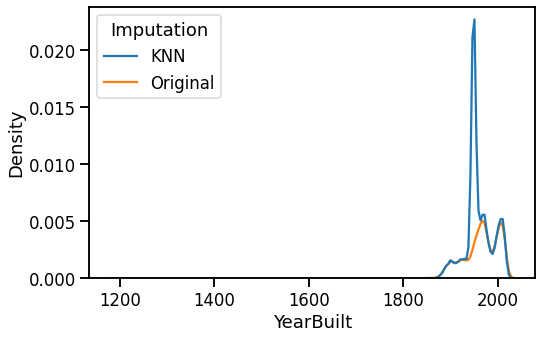

In [ ]:
fig = plt.figure(figsize=(8, 5))
seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria']
Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria', 'Rooms', 'Distance']


,Type=h,Type=t,Type=u,Regionname=Eastern Metropolitan,Regionname=Eastern Victoria,Regionname=Northern Metropolitan,Regionname=Northern Victoria,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Western Metropolitan,Regionname=Western Victoria,Rooms,Distance,pca1,pca2
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.669418,-0.292703
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.669418,-0.292703
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.620201,0.619633
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.620201,0.619633
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.5,-7.570984,1.531969


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
